In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from astropy import units as u
from poliastro.bodies import Earth
from poliastro.twobody.orbit import Orbit
from astropy.constants import G
from poliastro.twobody.sampling import TrueAnomalyBounds
from astropy.coordinates import CartesianRepresentation
plt.rcParams['font.family'] = 'Serif'
import sympy as sp
sp.init_printing()

# 2.1 Introduction
This chapter presents the vecotr based approach to the classical problem of determining the motion of two bodies due solely to their own gravitational attraction.

# 2.2 Equations of Motion in an Inertial Frame

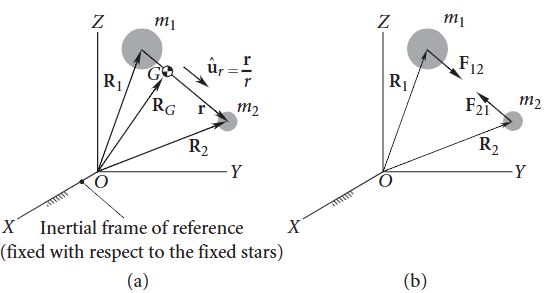

For the two masses $m_1$ and $m_2$ under the influence of just the gravitational forces, it can be proven that the centre of mass $\mathbf R_G$ can be the origin of an inertial frame of reference. The vector $\mathbf R_G$ is given by
$$
    \mathbf{R}_G = \frac{m_1\mathbf R_1 + m_2\mathbf R_2}{m_1 + m_2}
$$

Similarly, the velocity $\mathbf v_G$ and the acceleration $\mathbf a_G$ can be given by,
$$
    \mathbf v_G = \frac{m_1\mathbf{\dot R}_1 + m_2\mathbf{\dot R}_2}{m_1 + m_2}; \ \ \ \mathbf a_G = \frac{m_1\mathbf{\ddot R}_1 + m_2\mathbf{\ddot R}_2}{m_1 + m_2};
$$

Let's define the vector $\mathbf r = \mathbf R_2 - \mathbf R_1$ and the unit vector $\mathbf{\hat u}_r$ given by,
$$
    \mathbf{\hat u}_r = \frac{\mathbf r}{||\mathbf r||}
$$

The force on $m_1$ due to $m_2$ is given by
$$
    \mathbf F_{12} = \frac{Gm_1m_2}{||\mathbf r||^2}\mathbf{\hat u}_r = m_1\ddot{\mathbf R_1}
$$

Similarly, the force on $m_2$ due to $m_1$ is given by,
$$
    \mathbf F_{21} = -\frac{Gm_1m_2}{||\mathbf r||^2}\hat u_r = m_2\ddot{\mathbf R_2}
$$

From this, we can conclude that the acceleration of the centre of mass $\mathbf a_G$ is 0. Thus, the motion of the centre of mass is given by
$$
    \mathbf R_G = \mathbf R_{G_o} + \mathbf v_Gt
$$
Since the centre of mass is a non-accelerating point, it can form an inertial frame of reference.

The gravitation potential $V$ is given by,
$$
    V = \frac{Gm_1m_2}{r}
$$
with the gavitation force derived as
$$
    \mathbf F = \nabla V
$$

# 2.3 Equations of Relative Motion

Let's derive the equations of motion of mass $m_2$ w.r.t $m_1$. Evaluating $m_1\mathbf F_{21} - m_2\mathbf F_{12}$ gives,
$$
    m_1m_2(\mathbf{\ddot R_2} - \mathbf{\ddot R_1}) = -\frac{Gm_1m_2}{r^2}(m_1 + m_2)\mathbf{\hat  u}_r
$$
or
$$
    \mathbf{\ddot r} = -\frac{G(m_1 + m_2)}{r^2}\mathbf{\hat  u}_r = -\frac{\mu}{r^3}\mathbf r
$$
Let's define a coordinate system $xyz$ attached to $m_1$ as shown below

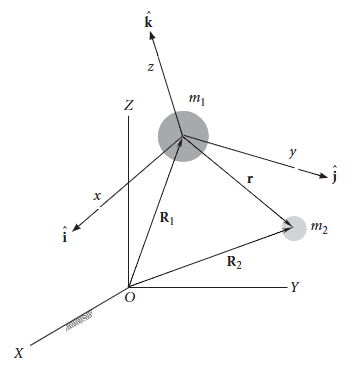

In this frame, the position of $m_2$ relative to $m_1$ is given by $\mathbf r_{\text{rel}} = x\mathbf{\hat  i} + y\mathbf{\hat  j} + z\mathbf{\hat  k}$. Similarly, the velocity and the acceleration is given by,
$$
    \mathbf{\dot r}_{\text{rel}} = \dot x\mathbf{\hat  i} + \dot y\mathbf{\hat  j} + \dot z\mathbf{\hat  k}; \ \ \ \mathbf{\ddot r}_{\text{rel}} = \ddot x\mathbf{\hat  i} + \ddot y\mathbf{\hat  j} + \ddot z\mathbf{\hat  k}
$$

The absolute acceleration can be written using the transport theorem as
$$ 
    \mathbf{\ddot r} = \mathbf{\ddot r}_{\text{rel}} + \mathbf{\dot \Omega}\times\mathbf r_{\text{rel}} + \mathbf\Omega\times(\mathbf\Omega\times\mathbf r_{\text{rel}}) + 2\mathbf\Omega\times\mathbf{\dot r}_{\text{rel}}
$$

It should be noted that $\mathbf{\ddot r} = \mathbf{\ddot r}_{\text{rel}}$ only when $\mathbf\Omega$ and $\mathbf{\dot\Omega}$ are zero, i.e, the frame is not rotating.

Now, we know that the centre of mass is an inertial frame of reference for bodies under their own gravitational force. To track the trajectory of the individual masses in space, it is convenient to write their equations of motion relative to the centre of mass, and then add the trajectory of the COM itself. Let $\mathbf r_1$ and $\mathbf r_2$ be the position vectors of $m_1$ and $m_2$ w.r.t the COM, the force on $m_2$ is given by,
$$
    m_2\mathbf{\ddot r}_2 = -\frac{Gm_1m_2}{r^2}\mathbf{\hat  u}_r
$$

Since the position vector of the COM w.r.t itself is zero, we can write
$$
    m_1\mathbf r_1 + m_2\mathbf r_2 = 0
$$

or,
$$
    \mathbf r_1 = -\frac{m_2}{m_1}\mathbf r_2
$$

Substituting this in the equation $\mathbf r = \mathbf r_2 - \mathbf r_1$, we get
$$
    \mathbf r = \frac{m_1 + m_2}{m_1}\mathbf r_2
$$

Taking the double derivative of this equation, we get
$$
    \mathbf{\ddot r} = \frac{m_1 + m_2}{m_1}\mathbf{\ddot r_2}
$$

Since $\mathbf{\ddot r} = -(\mu/r^3)\mathbf r$, we have
$$
    -\frac{\mu}{r^3}\frac{m_1 + m_2}{m_1}\mathbf r_2 = \frac{m_1 + m_2}{m_1}\mathbf{\ddot r_2}
$$
or
$$
    \mathbf{\ddot r_2} = -\left(\frac{m_1}{m_1 + m_2}\right)^3\frac{\mu}{r_2^3}\mathbf r_2
$$

Let
$$
    \mu' = -\left(\frac{m_1}{m_1 + m_2}\right)^3\mu
$$

Thus,
$$
    \mathbf{\ddot r_2} = -\frac{\mu'}{r_2^3}\mathbf r_2
$$

Similarly, the solution of $\mathbf r_1$ can be given by
$$
    \mathbf{\ddot r_1} = -\frac{\mu''}{r_1^3}\mathbf r_1
$$


# 2.4 Angular Momentum and the Orbit Formulas
In this section, we will derive the trajectory of the bodies governed by the equation of motion of the form:
$$
    \mathbf{\ddot r} = -\frac{\mu}{r^3}\mathbf r
$$

Before that, let's derive a few properties of the trajectory from this equation. Let's define the Anglular Momentum $\mathbf H_{2/1}$ of $m_2$ relative to $m_1$ as
$$
    \mathbf H_{2/1} = \mathbf r\times m_2\mathbf{\dot r}
$$

Define the specific angular momentum $\mathbf h = \mathbf H_{2/1}/m_2$. Taking the time derivative of $\mathbf h$ gives,
$$
    \begin{align*}
        \mathbf{\dot h} &= \mathbf{\dot r}\times\mathbf{\dot r} + \mathbf r\times\mathbf{\ddot r} \\
                     &= -\frac{\mu}{r^3}\mathbf r\times\mathbf r\\
                     &= 0
    \end{align*}
$$

This shows that the specific angular momentum $\mathbf h$ is a constant. It can also be proven that the Areal Velocity $dA/dt$ is a constant and is equal to $h/2$. Now, let's take a cross product of the equation of motion with $\mathbf h$,
$$
    \mathbf{\ddot r}\times\mathbf h = -\frac{\mu}{r^3}\mathbf r\times \mathbf h
$$

The LHS can be written as,
$$
    \begin{align*}
        \mathbf{\ddot r}\times\mathbf h &= \frac{d}{dt}(\mathbf{\dot r} \times \mathbf h) - \mathbf{\dot r}\times\mathbf{\dot h} \ \ \ \ (\mathbf{\dot h} = 0)\\
                                  &= \frac{d}{dt}(\mathbf{\dot r} \times \mathbf h)
    \end{align*}
$$

Similarly, we can rewrite the RHS as,
$$
    \begin{align*}
        \frac{1}{r^3}\mathbf r\times \mathbf h &= \frac{1}{r^3}\mathbf r\times (\mathbf r \times \mathbf{\dot r}) \\
                                         &= \frac{1}{r^3}[\mathbf r(\mathbf r\cdot\mathbf{\dot r}) - \mathbf{\dot r}(\mathbf r\cdot \mathbf r)] \\
                                         &= \frac{1}{r^3}[\mathbf r(r\dot r) - \mathbf{\dot r}r^2] \\
                                         &= \frac{\dot r}{r^2}\mathbf r - \frac{\mathbf{\dot r}}{r} \\
                                         &= -\frac{d}{dt}\left(\frac{\mathbf r}{r}\right)
    \end{align*}
$$

Substituting both the terms, we get,
$$
    \frac{d}{dt}\left(\mathbf{\dot r} \times \mathbf h - \frac{\mu}{r}\mathbf r\right) = 0
$$

Therefore,
$$
    \mathbf{\dot r} \times \mathbf h - \frac{\mu}{r}\mathbf r = \mathbf C
$$

Where $\mathbf C$ is a constant vector with $C = ||\mathbf C||$ as its magnitude. Now, taking a dot product of the above equation with $\mathbf r$ gives,
$$
    \begin{align*}
        \mathbf r\cdot(\mathbf{\dot r} \times \mathbf h) - \frac{\mu}{r}\mathbf r\cdot \mathbf r &= \mathbf r\cdot \mathbf C \\
        (\mathbf r\times\mathbf{\dot r})\cdot \mathbf h - \mu r &= rC\cos\theta \\
        \mathbf h\cdot\mathbf h &= \mu r + rC\cos\theta \\
        \frac{h^2}{\mu} &= r(1 + e\cos\theta) \\ 
        r &= \frac{p}{1 + e\cos\theta}
    \end{align*}
$$
This is the orbit equation, where $\mathbf e = \mathbf C/\mu$ is the eccentricity vector, $\theta$ is the true anomaly and $p=h^2/\mu$ is the semi-latus rectum of the orbit. The line defined by the eccentricity vector is the apse line and the true anomaly is the angle between $\mathbf r$ and $\mathbf e$.

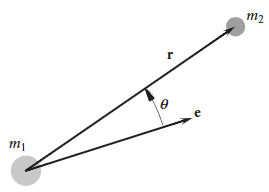

In [129]:
m = 1.5e11
mu = 2*G.value*m
mup = mu/8

R1 = sp.Matrix([0, 0, 0])
R2 = sp.Matrix([5, 0, 0])
dotR1 = sp.Matrix([0, 0, 0])
dotR2 = sp.Matrix([2*np.cos(np.pi/4), 0, 2*np.sin(np.pi/4)])

rC0 = (R1 + R2)/2
vC = (dotR1 + dotR2)/2
rC0Mag = float(rC0.norm())

t = np.linspace(0, 10, 500)
rC = (((vC*t) + np.array(rC0)).T).astype(float)

r = R2 - R1
dotr = dotR2 - dotR1
rMag = float(r.norm())

h = r.cross(dotr)
p = h.norm()**2/mu
C = dotr.cross(h) - mu/rMag*r
CMag = C.norm()
e = (CMag/mu)


In [ ]:
traces = []

phi = np.linspace(0, np.pi, 30)
lam = np.linspace(0, 2*np.pi, 30)
Phi, Lam = np.meshgrid(phi, lam)
Re = 0.5
Xs = Re * np.sin(Phi) * np.cos(Lam)
Ys = Re * np.sin(Phi) * np.sin(Lam)
Zs = Re * np.cos(Phi)

B1 = go.Surface(
    x=Xs, y = Ys, z=Zs,
    opacity=0.5,
    colorscale='Blues',
    showscale=False,
    name='B1'
)

traces.append(B1)

Xs = rMag + Re * np.sin(Phi) * np.cos(Lam)
Ys = Re * np.sin(Phi) * np.sin(Lam)
Zs = Re * np.cos(Phi)

B2 = go.Surface(
    x = Xs, y = Ys, z= Zs,
    opacity=0.5,
    colorscale='Blues',
    showscale=False,
    name='B2'
)

traces.append(B2)

Xs = rC0Mag + Re/3 * np.sin(Phi) * np.cos(Lam)
Ys = Re/3 * np.sin(Phi) * np.sin(Lam)
Zs = Re/3 * np.cos(Phi)

COM = go.Surface(
    x = Xs, y = Ys, z= Zs,
    opacity=0.5,
    colorscale='Reds',
    showscale=False,
    name='COM'
)

traces.append(COM)

trCOM = go.Scatter3d(
    x = rC[:, 0], y = rC[:, 1], z = rC[:, 2],
    mode='lines',
    line=dict(color='green', width=4),
    name='COM Trajectory'
)

traces.append(trCOM)

fig = go.Figure(data=traces)

fig.update_layout(
    # width=800,
    # height=600,

    # Title styling
    # title=dict(
    #     text="3D Equatorial Orbits: LEO / MEO / GEO",
    #     font=dict(size=28)            # title font size
    # ),

    # Legend styling
    # legend=dict(
    #     font=dict(size=16),           # legend text size
    #     bgcolor="rgba(255,255,255,0.7)"  # semi-transparent background (optional)
    # ),

    # Default font for hover, etc.
    font=dict(
        size=14                       # base font size
    ),

    scene=dict(
        xaxis=dict(
            title="X (m)",
            title_font=dict(size=15),  # x-axis label size
            tickfont=dict(size=10)     # x-axis tick label size
        ),
        yaxis=dict(
            title="Y (m)",
            title_font=dict(size=15),
            tickfont=dict(size=10)
        ),
        zaxis=dict(
            title="Z (m)",
            title_font=dict(size=15),
            tickfont=dict(size=10)
        ),
        aspectmode='data'
    )
)

# fig.show()


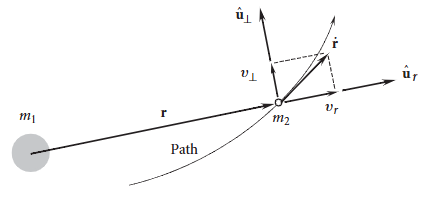

Let's derive the velocity components of the orbiting object. The velocity component perpendicular to $\mathbf r$ is given in terms of the angular velocity $\dot\theta$ as,
$$
    v_{\perp} = r\dot\theta
$$
This gives the specific angular momentum $h=rv_{\perp}$ in terms of the angular velocity as $h=r^2\dot\theta$. With this formulation of $h$, it is convenient to write the azimuthal velocity $v_{\perp}$ in terms of the constants as,
$$
    v_{\perp} = \frac{h}{r} = \frac{\mu}{h}(1 + e\cos\theta)
$$
Since $v_r=\dot r$, we can take the time derivative of the scalar orbit equation to get,
$$
    v_r = \frac{h^2}{\mu}\frac{e\sin\theta}{(1 + e\cos\theta)^2}\frac{h}{r^2}
$$
which upon simplification becomes
$$
    v_r = \frac{\mu}{h}e\sin\theta
$$

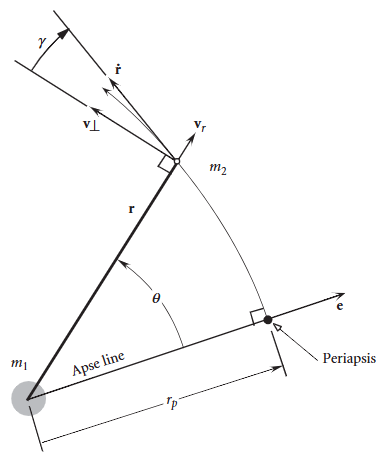

The periapsis $r_p$ is the position of $m_2$ with zero true anomaly, given by
$$
    r_p = \frac{p}{1 + e}
$$
The flight path angle $\gamma$, defined as the angle between $\mathbf{\dot r}$ and the direction perpendicular to $\mathbf r$ (local horizon), is given by
$$
    \tan\gamma = \frac{v_r}{v_{\perp}}
$$
which, upon substitution, becomes
$$
    \tan\gamma = \frac{e\sin\theta}{1 + e\cos\theta}
$$

# 2.5 The Energy Law
We again begin with the equation of relative motion and take a dot product with the relative velocity vector $\mathbf{\dot r}$ as follows,
$$
    \begin{align*}
        \mathbf{\ddot r}\cdot\mathbf{\dot r} &= -\frac{\mu}{r^3}\mathbf r \cdot \mathbf{\dot r} \\
        \frac{1}{2}\frac{d}{dt}(\mathbf{\dot r}\cdot\mathbf{\dot r}) &= -\frac{\mu}{r^3}r\dot r \\
        \frac{1}{2}\frac{d}{dt}(\mathbf v\cdot\mathbf v) &= -\mu\frac{\dot r}{r^2} \\
        \frac{d}{dt}\left(\frac{v^2}{2}\right) &= \frac{d}{dt}\left(\frac{\mu}{r}\right) \\
        \frac{d}{dt}\left(\frac{v^2}{2} - \frac{\mu}{r}\right) &= 0 \\
        \therefore \ \frac{v^2}{2} - \frac{\mu}{r} &= \varepsilon \ (\text{constant})
    \end{align*}
$$
gives the specific energy $\varepsilon$ of the orbit. Here, $v^2/2$ is the relative kinetic energy per unit mass and $(-\mu/r)$ is the potential energy per unit mass of $m_2$ in the gravitational field of $m_1$. This equation demonstrates the principle of energy conservation, showing that the specific mechanical energy $\varepsilon$ is the same at all points in an orbit. This equation is also known as the _vis-viva_ (living-force) equation.

The specific mechanical energy at the periapsis is given by,
$$
    \varepsilon_P = \frac{v_P^2}{2} - \frac{\mu}{r_P}
$$
Since $v_P = v_{\perp}$ at the periapsis and $h = rv_{\perp}$, we have,
$$
    \varepsilon = \frac{1}{2}\frac{h^2}{r_P^2} - \frac{\mu}{r_P} = \frac{\mu}{2}\left(\frac{p}{r_P^2} - \frac{2}{r_P}\right)
$$
Substituting $r_P = p/(1 + e)$, we get the value of $\varepsilon$ purely in terms of the orbital constants as,
$$
    \varepsilon = -\frac{1}{2}\frac{\mu^2}{h^2}(1 - e^2)
$$
The mechanical energy $\Large \boldsymbol{\varepsilon}$ of the mass $m_1$ is given by,
$$
    {\Large \boldsymbol{\varepsilon}} = m_1\varepsilon
$$

# 2.6 Circular Orbits

Circular orbits are characterised by $e=0$, giving the orbit equation as,
$$
    r = \frac{h^2}{\mu}
$$

Since $r$ is constant, $v_r = 0$, therefore $h = vr$. Substituting the orbit equation for $h$ gives,
$$
    v_{\text{circular}} = \sqrt{\frac{\mu}{r}}
$$

The period of the orbit $T$ is given by
$$
    T_{\text{circular}} = \frac{2\pi r}{\sqrt{\mu/r}} = \frac{2\pi}{\sqrt\mu}r^{3/2}
$$

The specific energy of the circular orbit is given by,
$$
    \varepsilon_{\text{circular}} = -\frac{1}{2}\frac{\mu^2}{h^2} = -\frac{\mu}{2r}
$$

Manual orbital spacecrafts, and unmanned remote sensing, navigation and communication satellites occupy circular Low Earth Orbits (LEO), ranging from 150 - 2000 km. LEO is well above the drag producing atmosphere (around 80 km) and well below the hazardous Van Allen radiation belts (innermost threshold of 2400 km). All orbital calculations concerning man-made objects in space have negligible mass compared to Earth, therefore the orbital parameter $\mu$ beomes independent of the mass of teh satellite, giving
$$
    \mu_{\text{earth}} = GM_{\text{earth}} = 398,600 \ km^3/s^2
$$

In [20]:
mu = Earth.k.value
RE = Earth.R.value
z = np.linspace(150, 2000, 1000)

v = np.sqrt(mu/(RE + z*1000))
T = 2*np.pi/np.sqrt(mu)*(RE + z*1000)**1.5

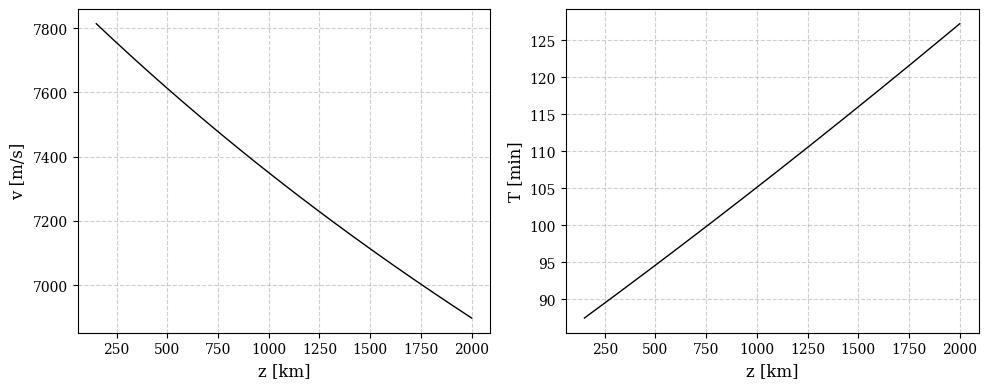

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(z, v, 'k', lw=1);
plt.grid(ls='--', alpha=0.6)
plt.xlabel('z [km]', size=12)
plt.ylabel('v [m/s]', size=12);

plt.subplot(1,2,2)
plt.plot(z, T/60, 'k', lw=1);
plt.grid(ls='--', alpha=0.6)
plt.xlabel('z [km]', size=12)
plt.ylabel('T [min]', size=12);

plt.tight_layout()

Sateliites that stay stationary above the same point on Earth's equator orbit in a Geosynchronous Equatorial Orbit (GEO). Such satellites have the same period as the Earth's sidereal day. There are two distinct periods percieved on Earth, these are:
1. Sidereal Day: One sidereal day is the time taken by Earth to complete one rotation ($2\pi$ radians) w.r.t the inertial space. 
2. Synodic Day: A synodic day is the time taken by the sun to apparently rotate once around the Earth. This period is what we observe as 24 hours. However, as the Earth is revolving around the sun, by the time it completes one absolute rotation about its axis, it advances $2\pi/365.26$ radians along its solar orbit.

Thus, the angular velocity of the Earth is computed as,
$$
    \omega_E = \frac{(2\pi + 2\pi/365.26)}{24 \ \text{hours}} = 72.9211\times10^{-6} \ rad/s
$$

Any satellite in the GEO must have the same angular velocity $\omega_E$.

In [36]:
wE = Earth.angular_velocity.value
r_GEO = (mu/wE**2)**(1/3)
z_GEO = r_GEO - RE
v_GEO = np.sqrt(mu/r_GEO)
print(z_GEO/1000)
print(v_GEO/1000)

35786.039620488154
3.0746598590079715


The GEO altitude is computd by equating the two values of the GEO speed as $v_{GEO} = \omega_E r_{GEO} = \sqrt{\mu/r_{GEO}}$, which gives 
$$
    r_{GEO} = 35786 \ km; \ \ \ v_{GEO} = 3.075 \ km/s
$$

Communication satellites are placed in the GEO because of their large ground coverage. 

### Ground Coverage

The ground coverage of any satellite is the amout of Earth's surface area visible to the satellite.

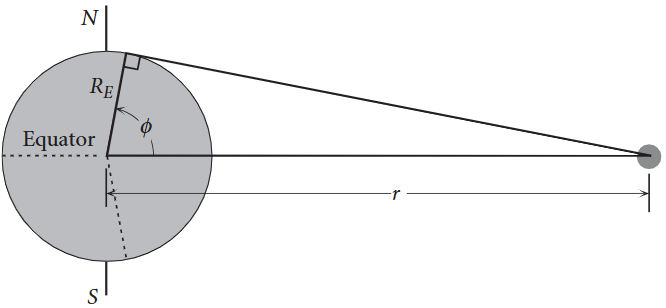

As shown in the image, the maximum latitude upto which a GEO satellite can observe is given by
$$
    \phi = \cos^{-1}\frac{R_E}{r}
$$
which, for $r_{GEO} = 42164 \ km$, comes out to be $81.3^{\circ}$. The ground coverage can then  be calculated as,
$$
    S = 2\pi R_E^2(1 - \cos\phi)
$$
This demonstrates that satellites in GEO cover $42.4\%$ of the total earth surface.

In [206]:
traces = []

# 1. Sample circle in 3D
theta = np.linspace(0, 2*np.pi, 300)
orbit_defs = {
    "LEO (400 km)":   400  * u.km,
    "MEO (20 000 km)":20_000 * u.km,
    "GEO (35 786 km)":35_786 * u.km,
}

# 2. Draw each orbit as a 3D line
for name, alt in orbit_defs.items():
    a = (Earth.R + alt).to(u.km).value  # semi-major axis
    x = a * np.cos(theta)
    y = a * np.sin(theta)
    z = np.zeros_like(theta)           # equatorial plane
    orb = Orbit.circular(Earth, alt, inc=0*u.deg)
    traces.append(
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            name=f"{name} (T={orb.period.to(u.hour).value:.2f} h)",
            line=dict(width=4)
        )
    )

# 3. Create a sphere for Earth
phi = np.linspace(0, np.pi, 30)
lam = np.linspace(0, 2*np.pi, 30)
Phi, Lam = np.meshgrid(phi, lam)
Re = Earth.R.to(u.km).value
Xs = Re * np.sin(Phi) * np.cos(Lam)
Ys = Re * np.sin(Phi) * np.sin(Lam)
Zs = Re * np.cos(Phi)

traces.append(
    go.Surface(
        x=Xs, y=Ys, z=Zs,
        opacity=0.5,
        colorscale='Blues',
        showscale=False,
        name='Earth'
    )
)

In [207]:
fig = go.Figure(data=traces)

fig.update_layout(
    width=1000,
    height=600,

    # Title styling
    title=dict(
        text="Circular Orbits: LEO / MEO / GEO",
        font=dict(size=28)            # title font size
    ),

    # Legend styling
    legend=dict(
        font=dict(size=16),           # legend text size
        bgcolor="rgba(255,255,255,0.7)"  # semi-transparent background (optional)
    ),

    # Default font for hover, etc.
    font=dict(
        size=14                       # base font size
    ),

    scene=dict(
        xaxis=dict(
            title="X (km)",
            title_font=dict(size=20),  # x-axis label size
            tickfont=dict(size=12)     # x-axis tick label size
        ),
        yaxis=dict(
            title="Y (km)",
            title_font=dict(size=20),
            tickfont=dict(size=12)
        ),
        zaxis=dict(
            title="Z (km)",
            title_font=dict(size=20),
            tickfont=dict(size=12)
        ),
        aspectmode='data'
    )
)

fig.show()


# 2.7 Elliptical Orbits

Elliptical orbits are characterised by the eccentricty range of $0 < e < 1$. With this eccentricity range, $r$ changes with $\theta$, but remains finite and bounded, as shown in the image below.

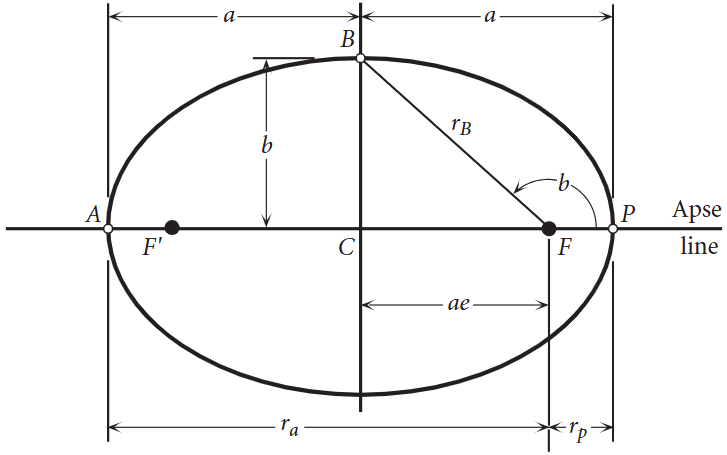

The largest value of $r$ is obtained at $\theta = 180^{\circ}$ which is called the apoapsis $r_a$, and is given by,
$$
    r_a = \frac{p}{1 - e}
$$

The ditance between the periapsis and the apoapsis is the major axis of the ellipse, thus 
$$
    2a = r_p + r_a
$$
where $a$ is the semi-major axis. Using the relations for $r_p$ and $r_a$, we get the semi-major axis $a$ as,
$$
    a = \frac{p}{1 - e^2}
$$

We can substitute the value $p$ in terms of $a$ as $p = a(1 - e^2)$ into the orbit equation to get,
$$
    r = \frac{a(1 - e^2)}{1 + e\cos\theta}
$$

This gives the $r_p$ and $r_a$ in terms of $a$ and $e$ as,
$$
    r_p = a(1 - e); \ \ r_a = a(1 + e)
$$

In the image above, the centre $C$ is $ae$ lemgth apart from the focus $F$. The orbital position $B$ lies above the centre $C$ and the distance between them is called the semi-minor axis $b$. To compute the value of $b$, we can use the pythagoras theorem to get,
$$
    b^2 = r_B^2 - a^2e^2
$$

Let for $\theta = \beta$, $r = r_B$. From the orbit equation, we get
$$
    r_B = \frac{a(1-e^2)}{1 + e\cos\beta}
$$

Moreover,
$$
    ae = r_B\cos(180^{\circ} - \beta) = -r_B\cos\beta = -\frac{a(1-e^2)}{1 + e\cos\beta}\cos\beta
$$
This gives $e=-\cos\beta$. Substituting this in the value of $r_B$ gives,
$$
    r_B = a
$$
and thus, the value of the semi-minor axis becomes
$$
    b = a\sqrt{1 - e^2}
$$

Recap that the specific mechanical energy in an orbit is given by,
$$
    \varepsilon = -\frac{1}{2}\frac{\mu^2}{h^2}(1 - e^2)
$$
With, $p = a(1 - e^2)$ for an ellipse, we can substitute $h^2 = \mu a(1-e^2)$ in the above equation to get,
$$
    \varepsilon = -\frac{\mu}{2a}
$$

This shows that the specific mechanical energy of a bounded orbit is independent of its eccentricity $e$ and only depends on its semi-major axis $a$. To obtain the period of an elliptical orbit, we employ Kepler's second law $dA/dt = h/2$ to obtain
$$
    \Delta A = \frac{h}{2}\Delta T
$$
For one complete orbit, the area of the ellipse if $2\pi ab$. This gives the period $T$ as,
$$
    \begin{align*}
        T &= \frac{2\pi ab}{h} \\
          &= \frac{2\pi}{h}a^2\sqrt{1 - e^2} \\
          &= \frac{2\pi}{\sqrt{\mu a(1- e^2)}}a^2\sqrt{1 - e^2} \\
          &= \frac{2\pi}{\sqrt{\mu}}a^{3/2} \\

    \end{align*}
$$

This relation also suggests that the period $T$, like $\varepsilon$, is independent of eccentricity. 

The average distance of the orbiting body to the focus is calculated as,
$$
    \begin{align*}
        \bar r_{\theta} &= \frac{1}{2\pi}\int_0^{2\pi}r(\theta)d\theta \\
                        &= \frac{a(1 - e^2)}{2\pi}\int_0^{2\pi}\frac{d\theta}{1 + e\cos\theta} \\
                        &= \frac{a(1 - e^2)}{2\pi}\frac{2\pi}{\sqrt{1 - e^2}} \\
                        &= a\sqrt{1 - e^2} = b
    \end{align*}
$$

Thus, the average distance $\bar r_{\theta}$ of the orbiting body from the focus is equal to the semi-minor axis $b$. This average distance can also be wrtten as,
$$
    \bar r_{\theta} = \sqrt{r_pr_a}
$$

In [208]:
mu = Earth.k.to(u.km**3/u.s**2)
RE = Earth.R.to(u.km)
ecc = 0.6 * u.one
z_p = 400 * u.km

r_p = RE + z_p
a = r_p/(1 - ecc)
r_a = a*(1 + ecc)
b = a*np.sqrt(1 - ecc**2)
h = np.sqrt(mu*a*(1 - ecc**2))
v_p = h/r_p
v_a = h/r_a
T = (2*np.pi/np.sqrt(mu)*a**1.5).to(u.h)
p = h**2/mu
eps = -mu/2/a

theta_rav = np.arccos((p/b - 1)/ecc).to(u.deg)
vperp_rav = h/b
vr_rav = mu/h*ecc*np.sin(theta_rav)
v_rav = np.sqrt(vperp_rav**2 + vr_rav**2)
gamma_rav = np.arctan2(vr_rav, vperp_rav).to(u.deg)
beta = np.arccos(-ecc).to(u.deg)
gamma_rB = np.arctan2(ecc*np.sin(beta), 1 + ecc*np.cos(beta)).to(u.deg)


print('Perigee:', r_p.round(2), ',', v_p.round(2))
print('Apogee:', r_a.round(2), ',', v_a.round(2))
print()
print('Eccentricity:', ecc)
print('Semi-major Axis:', a.round(2))
print('Semi-minor Axis:', b.round(2))
print('Semi-latus Rectum:', p.round(2))
print('Period:', T.round(2))
print()
print('Average Distance:', b.round(2))
print('True Anomaly at r = Average Distance:', theta_rav.round(2), ',', (360*u.deg - theta_rav).round(2))
print('Flight path angle at r = Average Distance:', gamma_rav.round(2), ',', -gamma_rav.round(2))
print('Speed at r = Average Distance:', v_rav.round(2))
print()
print('Maximum Flight path angle:', gamma_rB.round(2))
print('True Anomaly at maximum Flight path angle:', beta.round(2))



Perigee: 6778.14 km , 9.7 km / s
Apogee: 27112.55 km , 2.43 km / s

Eccentricity: 0.6
Semi-major Axis: 16945.34 km
Semi-minor Axis: 13556.27 km
Semi-latus Rectum: 10845.02 km
Period: 6.1 h

Average Distance: 13556.27 km
True Anomaly at r = Average Distance: 109.47 deg , 250.53 deg
Flight path angle at r = Average Distance: 35.26 deg , -35.26 deg
Speed at r = Average Distance: 5.94 km / s

Maximum Flight path angle: 36.87 deg
True Anomaly at maximum Flight path angle: 126.87 deg


In [209]:
traces = []
phi = np.linspace(0, np.pi, 30)
lam = np.linspace(0, 2*np.pi, 30)
Phi, Lam = np.meshgrid(phi, lam)
Xs = RE * np.sin(Phi) * np.cos(Lam)
Ys = RE * np.sin(Phi) * np.sin(Lam)
Zs = RE * np.cos(Phi)

F = go.Surface(
    x = Xs, y = Ys, z = Zs,
    colorscale='Blues',
    showscale=False,
    opacity=0.5,
    name='Earth'
)

traces.append(F)

theta = np.linspace(0, 2*np.pi, 500)
orb = Orbit.from_classical(Earth, a, ecc, 0*u.deg, 0*u.deg, 0*u.deg, 0*u.deg)

r = orb.sample(theta.size)
nu = ((np.arctan2(r.y, r.x).to(u.deg).value + 360) % 360)*u.deg
o1 = go.Scatter3d(
    x = r.x.to(u.km).value,
    y = r.y.to(u.km).value,
    z = r.z.to(u.km).value,
    mode='lines',
    name='Elliptical Orbit',
    line=dict(width=4)
)

traces.append(o1)

In [210]:
fig = go.Figure(data=traces)

fig.update_layout(
    width = 1000,
    height = 600,

    scene=dict(aspectmode='data')
    
) 


fig.show()

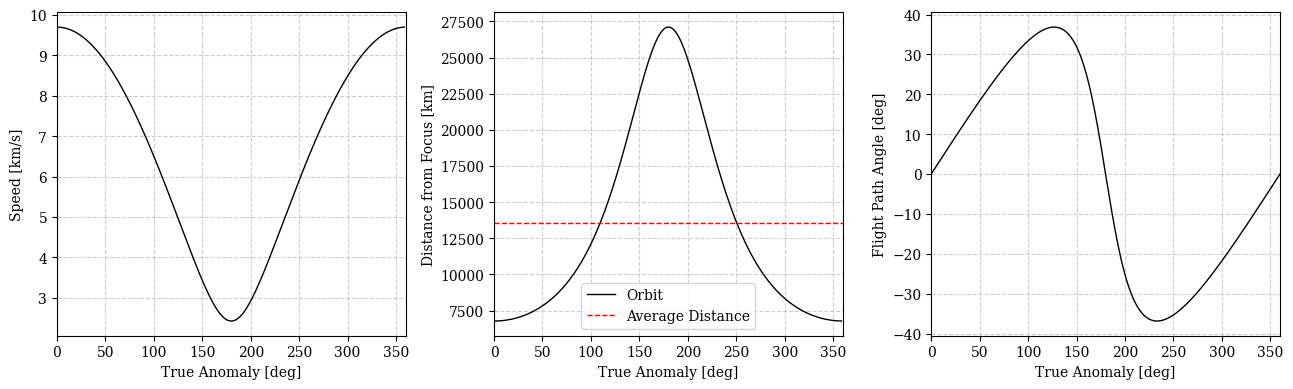

In [211]:
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
plt.plot(nu[:-1], np.sqrt((mu/r.norm()[:-1] + eps)*2), 'k', lw=1);
plt.grid(ls='--', alpha=0.6)
plt.xlim(0, 360);
plt.ylabel('Speed [km/s]')
plt.xlabel('True Anomaly [deg]')

plt.subplot(1,3,2)
plt.plot(nu[:-1], r.norm()[:-1], 'k', lw=1, label='Orbit');
# plt.plot(theta*180/np.pi, p/(1 + ecc*np.cos(theta)), 'b', lw=1, label='Orbit Equation');
plt.plot([0, 360], [b.value, b.value], 'r--', lw=1, label='Average Distance');
plt.grid(ls='--', alpha=0.6)
plt.xlim(0, 360);
plt.legend()
plt.ylabel('Distance from Focus [km]')
plt.xlabel('True Anomaly [deg]')

plt.subplot(1,3,3)
plt.plot(theta*180/np.pi, np.arctan2(ecc*np.sin(theta), 1 + ecc*np.cos(theta)).to(u.deg), 'k', lw=1);
plt.grid(ls='--', alpha=0.6)
plt.xlim(0, 360);
plt.ylabel('Flight Path Angle [deg]')
plt.xlabel('True Anomaly [deg]')

plt.tight_layout()

# 2.8 Parabolic Trajectories

Parabolic trajectories have unity eccentricity. With $e=1$, the orbit equation becomes,
$$
    r = \frac{p}{1 + \cos\theta}
$$

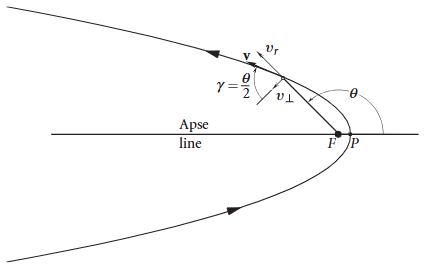

It can be seen that $r\to\infty$ when $\theta\to180^{\circ}$, making the trajectory unbounded. For parabolic trajectories with $e=1$, the specific mechanical energy $\varepsilon = 0$. Thus, the energy conservation equation gives,
$$
    \frac{v^2}{2} - \frac{\mu}{r} = 0
$$
Implying that anywhere on the trajectory, 
$$
    v = \sqrt{\frac{2\mu}{r}}
$$
Parabolic trajectories are called escape trajectories because the objects on this trajectory will coast to infinity and will not return. The escape velocity $v_{\text{esc}}$ at any distance $r$ thus becomes equal to the parabolic velocity at the $r$. So suppose a body has a velocity $v_o$ in a circular orbit with radius $r$, the escape velocity associated with that orbit is,
$$
    v_{\text{esc}} = \sqrt2 v_o
$$

That is, it requires 41.4% velocity boost to escape from the circular orbit.

The flight path angle on a parabolic trajectory is given by,
$$
    \tan\gamma = \frac{\sin\theta}{1 + \cos\theta}
$$

Using some trigonometric simplification, we can derive the following result:
$$
    \gamma = \frac{\theta}{2}
$$

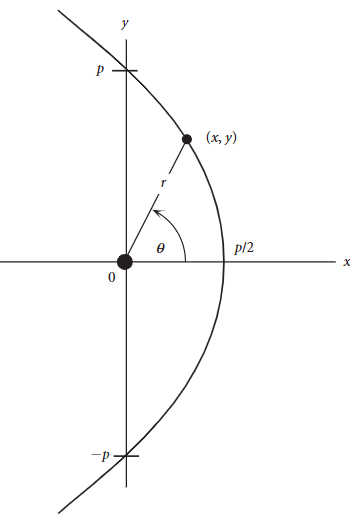

Substituting $x = r\cos\theta$ and $y = r\sin\theta$, one can derive the equation of the parabola in a cartesian coordinate system as,
$$
    x = \frac{p}{2} - \frac{y^2}{2p}
$$
where $p = h^2/\mu$ is the semi-latus rectum. This shows that the perigee $r_p$ for a parabolic trajectory is given by
$$
    r_p = \frac{p}{2}
$$

In [256]:
mu = Earth.k.to(u.km**3/u.s**2)
RE = Earth.R.to(u.km)
ecc = 1 * u.one
z_p = 2000 * u.km
r_p = RE + z_p

p = 2*r_p
h = np.sqrt(mu*p)

theta = (np.linspace(-130, 130, 500) * u.deg)

In [257]:
r = []
for nu in theta:
    orb = Orbit.parabolic(Earth, p, 0*u.deg, 0*u.deg, 0*u.deg, nu)
    r.append(orb.r)

x = np.array([r_i[0].value for r_i in r]) * r[0][0].unit
y = np.array([r_i[1].value for r_i in r]) * r[0][0].unit
z = np.array([r_i[2].value for r_i in r]) * r[0][0].unit  # Should be ~0 for inc=0
combined_r = CartesianRepresentation(x=x, y=y, z=z)

In [258]:
traces = []

phi = np.linspace(0, np.pi, 30)
lam = np.linspace(0, 2*np.pi, 60)
Phi, Lam = np.meshgrid(phi, lam)
Xs = RE * np.sin(Phi) * np.cos(Lam)
Ys = RE * np.sin(Phi) * np.sin(Lam)
Zs = RE * np.cos(Phi)


F = go.Surface(
    x = Xs, y = Ys, z = Zs,
    colorscale='Blues',
    showscale=False,
    name='Earth',
    opacity=0.5
)

traces.append(F)

o2 = go.Scatter3d(
    x = combined_r.x, y = combined_r.y, z = combined_r.z,
    mode='lines',
    line=dict(width=4)
)

traces.append(o2)

In [259]:
fig = go.Figure(data=traces)

fig.update_layout(
    width = 1000,
    height = 600,
    
    scene=dict(aspectmode='data')
)

fig.show()

# 2.9 Hyperbolic Trajectories

If $e > 1$, the orbital equation represents a hyperbola, as shown below

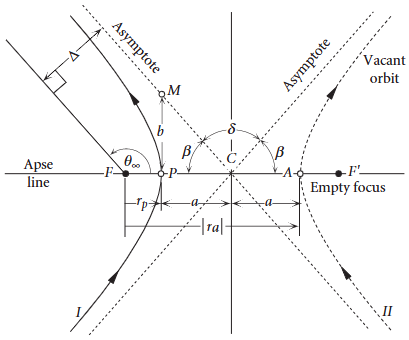

The denominator of the orbital equation goes to infinity for
$$
    \theta_{\infty} = \cos^{-1}(-1/e)
$$

$\theta_{\infty}$ is also called the true anomaly of the asymptote. The image shows two branches of the hyperbola, the phyical branch $I$ and the imaginary branch $II$. The periapsis lies on branch $I$ while the apoapsis lies on branch $II$ of the hyperbola. The halfway point between $r_p$ and $r_a$ is the centre $C$ of the hyperbola. The asymptotes intersect at $C$, making an acute angle $\beta$ with the apse line. By geometry, $\beta = 180^{\circ} - \theta_{\infty}$. This gives,
$$
    \beta = \cos^{-1}(1/e)
$$

The angle between the two asymptotes $\delta$ is called the turn angle, as this is the angle through which the velocity vector of the orbiting body is rotated as it rounds the attractor. It can be seen from the image that $\delta = 180^{\circ} - 2\beta$. This gives,
$$
    \delta = 2\sin^{-1}(1/e)
$$

The values of $r_p$ and $r_a$ are,
$$
    r_p = \frac{p}{1+e}; \ \ r_a = \frac{p}{1-e}
$$

With $e>1$, it can be noted that $r_a$ is negative. The distance between $r_a$ and $r_p$ is thus given by
$$
    2a = |r_a| - r_p = -r_a - r_p
$$

Substituting for $r_a$ and $r_p$, we get
$$
    a = \frac{p}{e^2 - 1}
$$
giving the orbital equation as
$$
    r = \frac{a(e^2 - 1)}{1 + e\cos\theta}
$$

Thus, $r_p = a(e - 1)$ and $r_a = -a(1 + e)$. The distance $b$ from the periapsis to the asymptote perpendicular to the apse line is the semi-minor axis of the hyperbola. From geometry, it can be seen that
$$
    b = a\tan\beta = a\sqrt{e^2 - 1}
$$

The distance $\Delta$ between the asymptote and a line parallel to it passing through the focus $F$ is called the aiming radius. From the image, it is clear that
$$
    \Delta = (r_p + a)\sin\beta = ae\sin\beta = a\sqrt{e^2 - 1} = b
$$
Thus, the aiming radius is equal to the semi-minor axis of the hyperbola.

The specific energy $\varepsilon$ of the parabolic trajectory is positive, and is given by,
$$
    \varepsilon = \frac{\mu}{2a}
$$
To find out the velocity at which the object will finallt reach at $r\to\infty$, we can use tthis specific energy relation to get
$$
    v_{\infty} = \sqrt{\frac{\mu}{a}}
$$
For a given orbit, this value is constant. Thus, the energy conservation can be re-written as
$$
    \frac{v^2}{2} - \frac{\mu}{r} = \frac{v_{\infty}^2}{2}
$$
Recalling the relation for the escape velocity $v_{\text{esc}} = \sqrt{2\mu/r}$, the above equation can be reformulated as
$$
    v^2 = v_{\text{esc}}^2 + v_{\infty}^2
$$

The square of $v_{\infty}$ is also denoted by $C_3$, called the characteristic energy. It is the excess kinetic energy over what is required to simply escape the attracting body at $F$. It is a measure of the energy required for an interplanetary mission and $C_3$ is also the maximum energy that can be imparted by a launch vehicle to a spacecraft of a given mass. To match a launch vehicle to a mission,
$$
    C_3|_{\text{launch vehicle}} > C_3|_{\text{mission}}
$$
Note that $v_{\infty}$ can also be written in terms of the specific angullar momentum as
$$
    v_{\infty} = \frac{\mu}{h}e\sin\theta_{\infty} = \frac{\mu}{h}\sqrt{e^2-1}
$$

In [282]:
mu = Earth.k.to(u.km**3/u.s**2)

r = 14600*u.km
v = 8.6*u.km/u.s
gamma = 50*u.deg

v_esc = np.sqrt(2*mu/r)
print('Escape Velocity:', v_esc.round(2))
v_inf = np.sqrt(v**2 - v_esc**2)
print('Excess Speed:', v_inf.round(2))
C3 = v_inf**2
print('Characteristic Energy:', C3.round(2))
print()

v_perp = v*np.cos(gamma)
h = r*v_perp
print('Specific Angular Momentum:', h.round(2))
a = mu/v_inf**2
print('Semi-major Axis:', a.round(2))
p = h**2/mu
ecc = np.sqrt(p/a + 1)
print('Eccentricity:', ecc.round(2))
theta = np.arccos((p/r - 1)/ecc).to(u.deg)
print('True Anomaly:', theta.round(2))
print()

r_p = a*(ecc - 1)
print('Radius of Perigee:', r_p.round(2))
delta = 2*np.arcsin(1/ecc).to(u.deg)
print('Turning Angle:', delta.round(2))
b = a*np.sqrt(ecc**2 - 1)
print('Aiming Radius:', b.round(2))

Escape Velocity: 7.39 km / s
Excess Speed: 4.4 km / s
Characteristic Energy: 19.36 km2 / s2

Specific Angular Momentum: 80708.41 km2 / s
Semi-major Axis: 20591.84 km
Eccentricity: 1.34
True Anomaly: 84.89 deg

Radius of Perigee: 6985.9 km
Turning Angle: 96.61 deg
Aiming Radius: 18344.15 km


# 2.10 Perifocal Frame

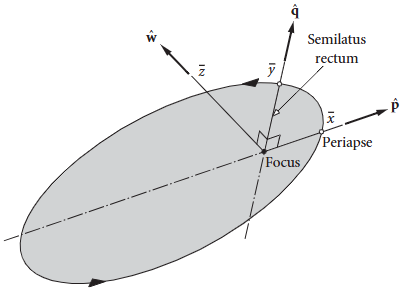

A perifocal frame is the 'natural frame' of an orbit situated at its Focus. It's $\bar x\bar y$ plane depicts the orbital plane. The x-axis of the orbit is directed from the Focus towards the Periapsis, as shown in the image. The unit vector along the $\bar x$ axis is denoted by $\mathbf{\hat p}$. The $\bar y$ axis $\mathbf{\hat q}$ lies at $\theta = 90^{\circ}$ and its $\bar z$ axis is normal to the plane, directed towards the angular momentum vector $\mathbf h$. Thus, the $\bar z$ unit vector $\mathbf{\hat w}$ is given by,
$$
    \mathbf{\hat w} = \frac{\mathbf h}{h}
$$

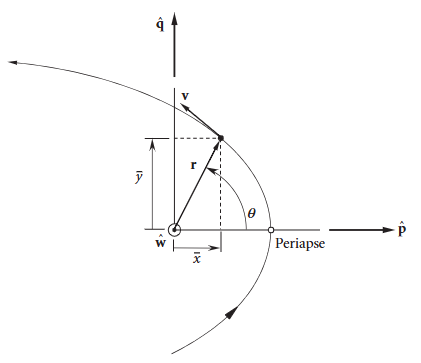

The position vector $\mathbf r$ in the perifocal frame is given by
$$
    \mathbf r = \bar x\mathbf{\hat p} + \bar y\mathbf{\hat q}
$$
where, $\bar x = r\cos\theta$ and $\bar y = r\sin\theta$. Here, $r$ is derived from the orbit equation as $r=p/(1 + e\cos\theta)$

The velocity $\mathbf v$ is derived by taking the time derivative of $\mathbf r$ as
$$
    \mathbf{\dot r} = \dot{\bar x}\mathbf{\hat p} + \dot{\bar y}\mathbf{\hat q}
$$
Takinf the derivative of $\bar x$ and $\bar y$, we obtain
$$
    \begin{align*}
        \dot{\bar x} &= \dot r\cos\theta - r\dot\theta\sin\theta \\
        \dot{\bar y} &= \dot r\sin\theta + r\dot\theta\cos\theta \\
    \end{align*}
$$
where,
$$
    \dot r = v_r = \frac{\mu}{h}e\sin\theta; \ \ \ r\dot\theta = v_{\perp} = \frac{\mu}{h}e(1 + \cos\theta)
$$
Upon simplification, this gives,
$$
    \begin{align*}
        \dot{\bar x} &= -\frac{\mu}{h}\sin\theta \\ 
        \dot{\bar y} &= \frac{\mu}{h}(e + \cos\theta) \\ 
    \end{align*}
$$
Thus, the velocity can be written as
$$
    \mathbf v = \frac{\mu}{h}[-\sin\theta\mathbf{\hat p} + (e + \cos\theta)\mathbf{\hat q}]
$$

# 2.11 The Lagrange Coefficients
In this section, we will establish how to find the position and the velocity of a body at a given instant given its initial state. Recall that,
$$
    \begin{align*}
    \mathbf r &= \bar x\mathbf{\hat p} + \bar y\mathbf{\hat q} \\
    \mathbf v &= \mathbf{\dot r} = \dot{\bar x}\mathbf{\hat p} + \dot{\bar y}\mathbf{\hat q}
    \end{align*}
$$
Let the initial conditions be measured at a time $t=t_o$. The position and the velocity vector thus become
$$
    \mathbf r_o = \bar x_o\mathbf{\hat p} + \bar y_o\mathbf{\hat q} \\
    \mathbf v_o = \dot{\bar x}_o\mathbf{\hat p} + \dot{\bar y}_o\mathbf{\hat q}
$$
The angular momentum $\mathbf h$ is constant, so it can be derived by,
$$
    \mathbf h_o = \mathbf r_o\times \mathbf v_o = (\bar x_o\dot{\bar y}_o - \bar y_o\dot{\bar x}_o)\mathbf{\hat w} = h_o\mathbf{\hat w}
$$
This gives $h = \bar x_o\dot{\bar y}_o - \bar y_o\dot{\bar x}_o$. Now, to find the unit vectors $\mathbf{\hat p}$ and $\mathbf{\hat q}$, we substitute
$$
    \mathbf{\hat q} = \frac{1}{\bar y_o}\mathbf r_o - \frac{\bar x_o}{\bar y_o}\mathbf{\hat p}
$$
into the equation of $\mathbf v_o$ and solve for $\mathbf{\hat p}$ to get,
$$
    \mathbf{\hat p} = \frac{\dot{\bar y}_o}{h}\mathbf r_o - \frac{\bar y_o}{h}\mathbf v_o
$$
Substituting it back to get $\mathbf{\hat q}$ as,
$$
    \mathbf{\hat q} = -\frac{\dot{\bar x}_o}{h}\mathbf r_o + \frac{\bar x_o}{h}\mathbf v_o
$$
Now, substituting these values into the equations for $\mathbf r$ and $\mathbf v$, we get,
$$
    \begin{align*}
        \mathbf r &= \frac{\bar x\dot{\bar y}_o - \bar y\dot{\bar x}_o}{h}\mathbf r_o + \frac{-\bar x\bar y_o + \bar y\bar x_o}{h}\mathbf v_o \\
        \mathbf v &= \frac{\dot{\bar x}\dot{\bar y}_o - \dot{\bar y}\dot{\bar x}_o}{h}\mathbf r_o + \frac{-\dot{\bar x}\bar y_o + \dot{\bar y}\bar x_o}{h}\mathbf v_o \\
    \end{align*}
$$
Therefore,
$$
    \mathbf r = f\mathbf r_o + g\mathbf v_o \\
    \mathbf v = \dot f\mathbf r_o + \dot g\mathbf v_o
$$
The functions $f$ and $g$ are called the Lagrange Coefficients. It can be seen from the above equations that the vectors $\mathbf r$ and $\mathbf v$ are linear combinations $\mathbf r_o$ and $\mathbf v_o$. Let us now compute the specific angular momentum $\mathbf h$ at any given instant.
$$
    \mathbf h = \mathbf r\times \mathbf v = (f\mathbf r_o + g\mathbf v_o)\times(\dot f\mathbf r_o + \dot g\mathbf v_o)
$$
Simpifying this gives,
$$
    \begin{align*}
        \mathbf h &= f\mathbf r_o\times\dot f\mathbf r_o + f\mathbf r_o\times\dot g\mathbf v_o + g\mathbf v_o\times\dot f\mathbf r_o + g\mathbf v_o\times\dot g\mathbf v_o\\
                  &= f\dot f(\mathbf r_o\times\mathbf r_o) + f\dot g(\mathbf r_o\times\mathbf v_o) + g\dot f(\mathbf v_o\times\mathbf r_o) + g\dot g(\mathbf v_o\times\mathbf v_o)\\ 
                  &= (f\dot g - g\dot f)\mathbf r_o\times\mathbf v_o\\
                  &= (f\dot g - g\dot f)\mathbf h_o
    \end{align*}
$$
Since the specific angular momentum, is constant, $\mathbf h = \mathbf h_o$. This gives the relation on the lagrange coefficients as,
$$
    f\dot g - g\dot f = 1
$$
Thus if any of the three coefficients are know, the fourth can be calculated using this relation.

Now, lets derive the values of the lagrange coefficients in terms of the true anomaly. To begin, let's first note that at $t = t_o$
$$
    \bar x_o = r_o\cos\theta_o; \ \ \ \bar y_o = r_o\sin\theta_o\\
    \dot{\bar x}_o = -\frac{\mu}{h}\sin\theta_o; \ \ \ \dot{\bar y}_o = \frac{\mu}{h}(e  + \cos\theta_o)
$$
Substituting this in the relationfor $f$, we get,
$$
    f = \frac{\mu r}{h^2}(e\cos\theta + (\cos\theta\cos\theta_o + \sin\theta\sin\theta_o))
$$
Using the trigonometric relation $\cos(\theta - \theta_o) = \cos\theta\cos\theta_o + \sin\theta\sin\theta_o$ and putting $\Delta \theta = \theta - \theta_o$, we have 
$$
    f = \frac{\mu r}{h^2}(e\cos\theta + \cos\Delta\theta)
$$
Substituting $e\cos\theta = h^2/\mu r - 1$ from the orbit equation, we get
$$
    f = 1 - \frac{\mu r}{h^2}(1 - \cos\Delta\theta)
$$
The issue with this formulation is that we still require to calculate $r$ from the orbital equation which has eccentricity $e$ in it. To get the value of $r$ purely in terms of $\Delta \theta$, we substitute $\theta = \theta_o + \Delta \theta$ in the orbital equation to get
$$
    r = \frac{p}{1 + e\cos(\theta_o + \Delta\theta)} = \frac{p}{1 + e\cos\theta_o\cos\Delta\theta - e\sin\theta_o\sin\Delta\theta}
$$
We can substitute the values of $e\cos\theta_o$ and $e\sin\theta_o$ from the orbit equations of the initial conditions as
$$
    e\cos\theta_o = \frac{p}{r_o} - 1; \ \ \ e\sin\theta_o = \frac{hv_{ro}}{\mu}
$$
where the initial radial velocity can be calculated as $v_{ro} = \mathbf v_o \cdot \mathbf r_o/r_o$. Substituing these values in the equation for $r$, we finally get
$$
    r = \frac{p}{1 + \left(\frac{p}{r_o} - 1\right)\cos\Delta\theta - \frac{hv_{ro}}{\mu}\sin\Delta\theta}
$$
With that, we can get the value of $f$ purely in terms of $\Delta\theta$. Similarly, the other lagrange coefficients can also be derived in terms of $\Delta\theta$. A summary of these relations are as follows,
$$
    \begin{align*}
        f &= 1 - \frac{r}{p}(1 - \cos\Delta\theta) \\
        g &= \frac{rr_o}{h}\sin\Delta\theta \\
        \dot f &= \frac{\mu}{h}\frac{1 - \cos\Delta\theta}{\sin\Delta\theta}\left[\frac{1 - \cos\Delta\theta}{p} - \frac{1}{r_o} - \frac{1}{r}\right] \\
        \dot g &= 1 - \frac{r_o}{p}(1 - \cos\Delta\theta)
    \end{align*}
$$
So, we can see that to find the position and velocity at any time $t$ given the initial conditions at $t_o$, we do not require the information of the orbit it is travelling in. However, the information of the eccentricity $e$ can be obtained using the initial conditions by solving the following equations:
$$
    r_o = \frac{p}{1 + e\cos\theta_o}; \ \ \ v_{ro} = \frac{\mu}{h}e\sin\theta_o
$$
Using these relations, we can solve for the initial true anomaly $\theta_o$ and the eccentricity $e$.

In [6]:
r0 = sp.Matrix([8182.4, -6865.9, 0])
v0 = sp.Matrix([0.47572, 8.8116, 0])
mu = Earth.k.to(u.km**3/u.s**2).value

r0Mag = r0.norm()
v_r0 = v0.dot(r0)/r0Mag
h0 = r0.cross(v0)
h = h0.norm()
p = h**2/mu
dth = 120

r = p/(1 + (p/r0Mag - 1)*np.cos(np.deg2rad(dth)) - h*v_r0/mu*np.sin(np.deg2rad(dth)))
f = 1 - r/p*(1 - np.cos(np.deg2rad(dth)))
g = r*r0Mag*np.sin(np.deg2rad(dth))/h
fdot = mu/h*(1 - np.cos(np.deg2rad(dth)))/np.sin(np.deg2rad(dth))*((1 - np.cos(np.deg2rad(dth)))/p - 1/r0Mag - 1/r)
gdot = 1 - r0Mag/p*(1 - np.cos(np.deg2rad(dth)))
r = f*r0 + g*v0
v = fdot*r0 + gdot*v0

In order to use the Lagrange coefficients to find the position and velocity as a function of time, we need to establish a relation between $\Delta \theta$ and $t$, which is a fairly complex task covered in the next chapter. However, for times $t$ closer to $t_o$, polynomial expressions for $f$ and $g$ can be obtained by replacing $\Delta\theta$ with $\Delta t = t - t_o$. To achieve this, we perform a Taylor Series expansion of $\mathbf r(t)$ around $t = t_o$. Let's expand it the fourth order:
$$
    \mathbf r(t) = \mathbf r(t_o) + \left.\frac{d\mathbf r}{dt}\right|_{t = t_o}\Delta t + \left.\frac{d^2\mathbf r}{dt^2}\right|_{t = t_o}\Delta t^2 + \left.\frac{d^3\mathbf r}{dt^3}\right|_{t = t_o}\Delta t^3 + \left.\frac{d^4\mathbf r}{dt^4}\right|_{t = t_o}\Delta t^4
$$
In this expansion, the known terms are:
$$
    \mathbf r(t_o) = \mathbf r_o; \ \ \ \left.\frac{d\mathbf r}{dt}\right|_{t = t_o} = \mathbf v_o; \ \ \ \left.\frac{d^2\mathbf r}{dt^2}\right|_{t=t_o} = -\frac{\mu}{r_o^3}\mathbf r_o
$$
The higher order terms can be computed by taking the derivative of these terms. Upon substitution and simplification, one obtains the following lagrange coefficients:
$$
    \begin{align*}
        f &= 1 - \frac{\mu}{2r_o^3}\Delta t^2 + \frac{\mu}{2}\frac{\mathbf v_o\cdot\mathbf r_o}{r_o^5}\Delta t^3 + \frac{\mu}{24}\left[-2\frac{\mu}{r_o^6} + 3\frac{v_o^2}{r_o^5} - 15\frac{(\mathbf r_o\cdot\mathbf v_o)^2}{r_o^7}\right]\Delta t^4 \\
        g &= \Delta t - \frac{1}{6}\frac{\mu}{r_o^3}\Delta t^3 + \frac{\mu}{4}\frac{(\mathbf r_o\cdot\mathbf v_o)}{r_o^5}\Delta t^4
    \end{align*}
$$

The determinations of $r$ computed using the Taylor Series is only approximate over a short interval of time and diverge after a certain time interval. For example, in the image shown below, 

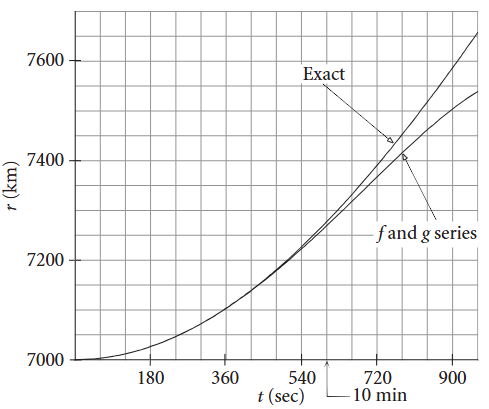

The taylor series diverges significantly just after 10 minutes. If more higher order terms are included, the approximation will be closer to the exact value for a longer period of time. However, there is a finite time interval beyond which the series approximation will diverge from teh exact solution no matter how many terms are included. This time interval is called the **radius of convergence**. 

# 2.12 Restricted Three-Body Problem
Let $m_1$ and $m_2$ be two bodies moving around each other in a circular orbit of radius $r_{12}$ under the influence of just their own gravitational force.

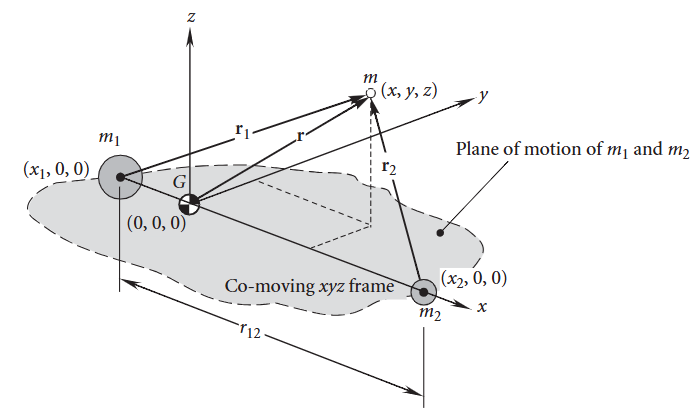

We establish a non-inertial co-moving frame $xyz$ centred at their COM with its $x$ axis pointing towards the mass $m_2$ and the $z$ axis perpendicular to the orbital plane. In this frame, $m_1$ ad $m_2$ appear to be at rest. However, their inertial angular momentum is given by,
$$
    \mathbf \Omega = \Omega\mathbf{\hat k}
$$
where $\Omega = 2\pi/T$. Since it's a circular orbit, the time period T is given by,
$$
    T = \frac{2\pi}{\sqrt\mu}r_{12}^{3/2}
$$
Thus,
$$
    \Omega = \sqrt{\frac{\mu}{r_{12}^3}}
$$
and $\mu = G(m_1 + m_2)$. Now, let's determine the position of $m_1$ and $m_2$ in this coordinate system. The position of the COM $0$, therefore
$$
    m_1x_1 + m_2x_2 = 0
$$
Moreover, the distance between $m_1$ and $m_2$ is $r_{12}$. Thus,
$$
    x_2 - x_1 = r_{12}
$$
Solving these two equations, we get
$$
    x_1 = -\pi_2r_{12}; \ \ \ x_2 = \pi_1r_{12}
$$
where,
$$
    \pi_1 = \frac{m_1}{m_1 + m_2}; \ \ \ \pi_2 = \frac{m_2}{m_1 + m_2}
$$

Now, we introduce a third body of mass $m$, which is vanishingly small than the masses $m_1$ and $m_2$, so it cannot influence the orbits of $m_1$ and $m_2$. This setup is called a **Circular Restricted 3 Body Problem (CR3BP)**. We are interested in the motion of $m$ in the gravitational field of $m_1$ and $m_2$. Unlike the two-body problem, the CR3BP does not have a closed form solution. However, some general conclusions can be inferred from the equations of motion of such problems. 

Let's write the position of $m$ relative to $m_1$ as
$$
    \mathbf r_1 = (x + \pi_2r_{12})\mathbf{\hat i} + y\mathbf{\hat j} + z\mathbf{\hat k}
$$
Similarly, its position relative to $m_2$ is,
$$
    \mathbf r_2 = (x - \pi_1r_{12})\mathbf{\hat i} + y\mathbf{\hat j} + z\mathbf{\hat k}
$$
Finally, its coordinates relative to the COM is
$$
    \mathbf r = x\mathbf{\hat i} + y\mathbf{\hat j} + z\mathbf{\hat k}
$$  
Since the coordinate system is rotating with an angular velocity of $\mathbf\Omega$, the velocity of the body $m$ in this frame is given using the transport equation as
$$
    \mathbf{\dot r} = \mathbf v_G + \mathbf\Omega\times\mathbf r + \mathbf v_{\text{rel}}
$$
where $\mathbf v_{\text{rel}} = \dot x\mathbf{\hat i} + \dot y\mathbf{\hat j} + \dot z\mathbf{\hat k}$. Similarly, the relative acceleration of mass $m$ is given by
$$
    \mathbf{\ddot r} = \mathbf a_G + \mathbf{\dot \Omega}\times\mathbf r + \mathbf\Omega\times(\mathbf\Omega\times\mathbf r) + 2\mathbf\Omega\times\mathbf v_{\text{rel}} + \mathbf a_{\text{rel}}
$$
Now, we know that the motion of the COM is non-accelerating, therefore $\mathbf a_G = 0$. Also, $\mathbf{\dot\Omega} = 0$. Thus, we have the final equation for the acceleration term as,
$$
    \mathbf{\ddot r} = \mathbf\Omega\times(\mathbf\Omega\times\mathbf r) + 2\mathbf\Omega\times\mathbf v_{\text{rel}} + \mathbf a_{\text{rel}}
$$
Let's now write the forces on the body $m$ due to $m_1$ and $m_2$. The total for on $m$ is $\mathbf F_{\text{net}} = \mathbf F_1 + \mathbf F_2$ where,
$$
    \mathbf F_1 = -\frac{Gm_1m}{r_1^3}\mathbf r_1 = -\frac{\mu_1m}{r_1^3}\mathbf r_1 \\
    \mathbf F_2 = -\frac{Gm_2m}{r_2^3}\mathbf r_2 = -\frac{\mu_2m}{r_2^3}\mathbf r_2
$$  
Thus, Newton's second law can be written for mass $m$ as,
$$
    \mathbf{\ddot r} = -\frac{\mu_1}{r_1^3}\mathbf r_1 - \frac{\mu_2}{r_2^3}\mathbf r_2
$$
Expanding the terms, we get the following acceleration components
$$
    \begin{align*}
        \ddot x - 2\Omega\dot y - \Omega^2x &= -\frac{\mu_1}{r_1^3}(x + \pi_2r_{12}) - \frac{\mu_2}{r_2^3}(x - \pi_1r_{12}) \\
        \ddot y + 2\Omega\dot x - \Omega^2y &= -\frac{\mu_1}{r_1^3}y - \frac{\mu_2}{r_2^3}y \\
        \ddot z &= -\frac{\mu_1}{r_1^3}z - \frac{\mu_2}{r_2^3}z \\
    \end{align*}
$$

## 2.12.1 The Lagrange Points

## 2.12.2 Jacobi Constant